In [1]:
# Importamos librerías
import requests
from bs4 import BeautifulSoup
import pandas as pd
import html
import numpy as np
import lxml

In [2]:

# Procesado del fichero con la población total
Locales_MAD = pd.read_csv('OPEN DATA Locales-Epigrafes202104.csv', sep=';')


C:\Users\barke\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py:3170: DtypeWarning: Columns (42,44) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# se imprimen los nombres de las columnas para saber cuales eliminar
print(Locales_MAD.keys().to_list())

['id_local', 'id_distrito_local', 'desc_distrito_local', 'id_barrio_local', 'desc_barrio_local', 'cod_barrio_local', 'id_seccion_censal_local', 'desc_seccion_censal_local', 'coordenada_x_local', 'coordenada_y_local', 'id_tipo_acceso_local', 'desc_tipo_acceso_local', 'id_situacion_local', 'desc_situacion_local', 'id_vial_edificio', 'clase_vial_edificio', 'desc_vial_edificio', 'id_ndp_edificio', 'id_clase_ndp_edificio', 'nom_edificio', 'num_edificio', 'cal_edificio', 'secuencial_local_PC', 'id_vial_acceso', 'clase_vial_acceso', 'desc_vial_acceso', 'id_ndp_acceso', 'id_clase_ndp_acceso', 'nom_acceso', 'num_acceso', 'cal_acceso', 'coordenada_x_agrupacion', 'coordenada_y_agrup', 'id_agrupacion', 'nombre_agrupacion', 'id_tipo_agrup', 'desc_tipo_agrup', 'id_planta_agrupado', 'id_local_agrupado', 'rotulo', 'id_seccion', 'desc_seccion', 'id_division', 'desc_division', 'id_epigrafe', 'desc_epigrafe']


In [4]:
Locales_MAD.drop(columns= ['id_local', 'cod_barrio_local', 'id_seccion_censal_local', 'coordenada_x_local', 'coordenada_y_local', 'desc_tipo_agrup', 'rotulo', 'id_seccion', 'id_division', 'id_epigrafe','id_tipo_acceso_local', 'desc_tipo_acceso_local', 'id_situacion_local', 'desc_situacion_local', 'id_vial_edificio', 'clase_vial_edificio', 'desc_vial_edificio', 'id_ndp_edificio', 'id_clase_ndp_edificio', 'nom_edificio', 'num_edificio', 'coordenada_x_agrupacion', 'coordenada_y_agrup', 'id_agrupacion', 'nombre_agrupacion', 'id_tipo_agrup', 'id_planta_agrupado', 'id_local_agrupado', 'cal_edificio', 'secuencial_local_PC', 'id_vial_acceso', 'id_ndp_acceso', 'id_clase_ndp_acceso','cal_acceso', 'clase_vial_acceso','desc_vial_acceso','nom_acceso','num_acceso'], inplace=True)


In [5]:
Locales_MAD

,id_distrito_local,desc_distrito_local,id_barrio_local,desc_barrio_local,desc_seccion_censal_local,desc_seccion,desc_division,desc_epigrafe
0,15,CIUDAD LINEAL,1502,PUEBLO NUEVO,74,COMERCIO AL POR MAYOR Y AL POR MENOR; REPARACI...,"COMERCIO AL POR MENOR, EXCEPTO DE VEHICULOS DE...",COMERCIO AL POR MENOR DE FRUTAS Y HORTALIZAS S...
1,4,SALAMANCA,401,RECOLETOS,6,OTROS SERVICIOS,OTROS SERVICIOS PERSONALES,CENTRO DE ESTETICA
2,10,LATINA,1005,CAMPAMENTO,153,OTROS SERVICIOS,OTROS SERVICIOS PERSONALES,SERVICIO DE PELUQUERIA
3,20,SAN BLAS-CANILLEJAS,2007,CANILLEJAS,101,OTROS SERVICIOS,OTROS SERVICIOS PERSONALES,SERVICIO DE PELUQUERIA
4,4,SALAMANCA,406,CASTELLANA,123,COMERCIO AL POR MAYOR Y AL POR MENOR; REPARACI...,"COMERCIO AL POR MENOR, EXCEPTO DE VEHICULOS DE...",COMERCIO AL POR MENOR DE PRENDAS DE VESTIR EN ...
...,...,...,...,...,...,...,...,...
165049,18,VILLA DE VALLECAS,1801,CASCO H.VALLECAS,46,COMERCIO AL POR MAYOR Y AL POR MENOR; REPARACI...,VENTA Y REPARACI0N DE VEHICULOS DE MOTOR Y MOT...,COMERCIO DE VEHICULOS DE MOTOR NUEVOS
165050,18,VILLA DE VALLECAS,1801,CASCO H.VALLECAS,46,COMERCIO AL POR MAYOR Y AL POR MENOR; REPARACI...,COMERCIO AL POR MAYOR E INTERMEDIARIOS DEL COM...,COMERCIO AL POR MAYOR DE BEBIDAS
165051,18,VILLA DE VALLECAS,1801,CASCO H.VALLECAS,46,COMERCIO AL POR MAYOR Y AL POR MENOR; REPARACI...,COMERCIO AL POR MAYOR E INTERMEDIARIOS DEL COM...,COMERCIO AL POR MAYOR DE BEBIDAS
165052,18,VILLA DE VALLECAS,1801,CASCO H.VALLECAS,46,ACTIVIDADES FINANCIERAS Y DE SEGUROS,"SEGUROS, REASEGUROS Y FONDOS DE PENSIONES, EXC...",SEGUROS


In [6]:
# Se genera un dataframe con las secciones, divisiones y epigrafes de las actividades comerciales de los locales para poder eliminar aquellas que no estén en el análisis de datos
DF_actividades = Locales_MAD.copy()
DF_actividades.drop(columns= ['id_distrito_local', 'desc_distrito_local', 'id_barrio_local', 'desc_barrio_local', 'desc_seccion_censal_local'], inplace=True)
DF_actividades['Locales'] = 1
DF_actividades.groupby('desc_epigrafe').sum().reset_index()
DF_actividades

,desc_seccion,desc_division,desc_epigrafe,Locales
0,COMERCIO AL POR MAYOR Y AL POR MENOR; REPARACI...,"COMERCIO AL POR MENOR, EXCEPTO DE VEHICULOS DE...",COMERCIO AL POR MENOR DE FRUTAS Y HORTALIZAS S...,1
1,OTROS SERVICIOS,OTROS SERVICIOS PERSONALES,CENTRO DE ESTETICA,1
2,OTROS SERVICIOS,OTROS SERVICIOS PERSONALES,SERVICIO DE PELUQUERIA,1
3,OTROS SERVICIOS,OTROS SERVICIOS PERSONALES,SERVICIO DE PELUQUERIA,1
4,COMERCIO AL POR MAYOR Y AL POR MENOR; REPARACI...,"COMERCIO AL POR MENOR, EXCEPTO DE VEHICULOS DE...",COMERCIO AL POR MENOR DE PRENDAS DE VESTIR EN ...,1
...,...,...,...,...
165049,COMERCIO AL POR MAYOR Y AL POR MENOR; REPARACI...,VENTA Y REPARACI0N DE VEHICULOS DE MOTOR Y MOT...,COMERCIO DE VEHICULOS DE MOTOR NUEVOS,1
165050,COMERCIO AL POR MAYOR Y AL POR MENOR; REPARACI...,COMERCIO AL POR MAYOR E INTERMEDIARIOS DEL COM...,COMERCIO AL POR MAYOR DE BEBIDAS,1
165051,COMERCIO AL POR MAYOR Y AL POR MENOR; REPARACI...,COMERCIO AL POR MAYOR E INTERMEDIARIOS DEL COM...,COMERCIO AL POR MAYOR DE BEBIDAS,1
165052,ACTIVIDADES FINANCIERAS Y DE SEGUROS,"SEGUROS, REASEGUROS Y FONDOS DE PENSIONES, EXC...",SEGUROS,1


In [7]:
# Se seleccionan los datos de la columna de secciones para visualizar cómo se categorizan a nivel más alto las actividades de los locales, con el fin de identificar las que puedan corresponder a actividades relacionadas con la hostelería
'''
CONCLUSION POST-EJECUCIÓN:
la categoría 'HOSTELERIA' es sujeto de estudio, y la de 'ACTIVIDADES ARTISTICAS, RECREATIVAS Y DE ENTRETENIMIENTO' puede serlo si contiene locales de actividades lúdicas como el teatro o cines o bailes
'''

lista_actividades = list(set(DF_actividades['desc_seccion'].to_list()))
lista_actividades


[nan,
 'AGRICULTURA, GANADERIA, SILVICULTURA Y PESCA',
 'EDUCACI0N',
 'COMERCIO AL POR MAYOR Y AL POR MENOR; REPARACI0N DE VEHICULOS DE MOTOR Y MOTOCICLETAS',
 'ACTIVIDADES PROFESIONALES, CIENTIFICAS Y TECNICAS',
 'ACTIVIDADES ARTISTICAS, RECREATIVAS Y DE ENTRETENIMIENTO',
 'ADMINISTRACI0N PUBLICA Y DEFENSA; SEGURIDAD SOCIAL OBLIGATORIA',
 'INDUSTRIAS EXTRACTIVAS',
 'CONSTRUCCI0N',
 'SIN ACTIVIDAD',
 'INFORMACI0N Y COMUNICACIONES',
 'ACTIVIDADES ADMINISTRATIVAS Y SERVICIOS AUXLIARES',
 'ACTIVIDADES INMOBILIARIAS',
 'TRANSPORTE Y ALMACENAMIENTO',
 'ACTIVIDADES SANITARIAS Y DE SERVICIOS SOCIALES',
 'ACTIVIDADES FINANCIERAS Y DE SEGUROS',
 'SUMINISTRO DE ENERGIA ELECTRICA, GAS, VAPOR Y AIRE ACONDICIONADO',
 'SUMINISTRO DE AGUA, ACTIVIDADES DE SANEAMIENTO, GESTI0N DE RESIDUOS Y DESCONTAMINACI0N',
 'INDUSTRIA MANUFACTURERA',
 'ACTIVIDADES DE ORGANIZACIONES Y ORGANISMOS EXTRATERRITORIALES',
 'HOSTELERIA',
 'OTROS SERVICIOS']

In [8]:
# Una vez identificados unos epígrafes relacionados con la hostelería, se analiza si la seccion ACTIVIDADES ARTISTICAS, RECREATIVAS Y DE ENTRETENIMIENTO debe incluirse en el análisis o no  
'''
CONCLUSIÓN POST-EJECUCIÓN:
la categoría 'ACTIVIDADES ARTISTICAS, RECREATIVAS Y DE ENTRETENIMIENTO' tiene 3 categorías que pueden incluirse en el análisis 
- TEATRO Y ACTIVIDADES ESCENICAS REALIZADAS EN DIRECTO
- SALAS DE FIESTA SIN RESTAURACION
- DISCOTECAS Y SALAS DE BAILE
'''
DF_actividades_FILTER_ACT = DF_actividades[DF_actividades['desc_seccion'] == 'ACTIVIDADES ARTISTICAS, RECREATIVAS Y DE ENTRETENIMIENTO']
lista_divisiones_ACT = list(set(DF_actividades_FILTER_ACT['desc_epigrafe'].to_list()))
lista_divisiones_ACT

['PARQUES ZOOLOGICOS, JARDINES BOTANICOS Y RESERVAS NATURALES',
 'SALONES DE RECREO Y DIVERSION Y OTRAS ACTIVIDADES RECREATIVAS',
 'PISCINAS DE COMUNIDADES DE VECINOS DE TEMPORADA',
 'DISCOTECAS Y SALAS DE BAILE',
 'JUEGOS DE AZAR Y APUESTAS DE GESTION PUBLICA O O AUTORIZACION ESPECIAL (ESTADO Y ONCE)',
 'PISCINA PRIVADA CLIMATIZADA',
 'TEATRO Y ACTIVIDADES ESCENICAS REALIZADAS EN DIRECTO',
 'CENTROS DE JUEGOS O CELEBRACIONES INFANTILES SIN COCINA',
 'ACTIVIDADES DE LOS GIMNASIOS',
 'SALAS DE FIESTA CON RESTAURACION',
 'PISCINAS DE USO PUBLLICO CLIMATIZADAS',
 'LOCALES DE EXHIBICIONES EROTICAS',
 'PISCINAS DE USO PUBLICO DE TEMPORADA',
 'ACTIVIDADES DE CREACION, ARTISTICAS Y ESPECTACULOS',
 'GESTION DE INSTALACIONES DEPORTIVAS',
 'SALAS DE FIESTA SIN RESTAURACION',
 'ACTIVIDADES DE BIBLIOTECAS, ARCHIVOS, MUSEOS Y DE GALERIAS Y SALAS DE EXPOSICIONES SIN VENTA',
 'JUEGOS DE AZAR Y APUESTAS DE GESTION PRIVADA (BINGOS, CASINOS, MAQUINAS TRAGAPERRAS)',
 'PISCINAS PUBLICAS CLIMATIZADAS/TEMPO

In [9]:
#Se contabilizan los locales en Madrid relacionados con el estudio (hostelería y ciertas actividades de entretenimiento)
DF_actividades_hosteleria = DF_actividades[(DF_actividades['desc_seccion'] == 'HOSTELERIA') | (DF_actividades['desc_epigrafe'] == 'DISCOTECAS Y SALAS DE BAILE') | (DF_actividades['desc_epigrafe'] == 'SALAS DE FIESTA SIN RESTAURACION')| (DF_actividades['desc_epigrafe'] == 'TEATRO Y ACTIVIDADES ESCENICAS REALIZADAS EN DIRECTO')]
DF_actividades_hosteleria.groupby('desc_epigrafe').sum().reset_index()

,desc_epigrafe,Locales
0,ALBERGUES JUVENILES Y OTROS ALOJAMIENTOS TURIS...,63
1,APART-HOTELES,58
2,AUTOSERVICIO DE RESTAURACION,40
3,BAR CON COCINA,4573
4,BAR ESPECIAL CON ACTUACIONES,85
5,BAR ESPECIAL SIN ACTUACIONES,952
6,BAR RESTAURANTE,4425
7,BAR SIN COCINA,1763
8,CAFE ESPECTACULO,130
9,CAFETERIA,3269


In [10]:
# Se genera el dataframe final con los locales agrupados por sección censal -> se eliminan las columnas de las categorías de los locales y se agrupan los datos por categorías censales 
DF_actividades = Locales_MAD.copy()

#Se filtran aquellos locales cuya actividad no corresponde con las actividades enmarcadas en el estudio
DF_actividades = DF_actividades[(DF_actividades['desc_seccion'] == 'HOSTELERIA') | (DF_actividades['desc_epigrafe'] == 'DISCOTECAS Y SALAS DE BAILE') | (DF_actividades['desc_epigrafe'] == 'SALAS DE FIESTA SIN RESTAURACION')| (DF_actividades['desc_epigrafe'] == 'TEATRO Y ACTIVIDADES ESCENICAS REALIZADAS EN DIRECTO')]

# Se añade una columna con una unidad para contabilizar los locales al agrupar 
DF_actividades['Locales'] = 1
DF_actividades = DF_actividades.groupby(['id_distrito_local', 'id_barrio_local']).sum().reset_index()
DF_actividades.drop(columns='desc_seccion_censal_local', inplace=True)

# Se modifican los campos de id_distrito_local e id_barrio_local para que concuerden con el formato del dato en la tabla de los votos
DF_actividades = DF_actividades.assign(id_barrio=lambda x: (x['id_barrio_local'] - x['id_distrito_local']*100 +x['id_distrito_local']*10))
DF_actividades = DF_actividades[['id_barrio','Locales']]
DF_actividades

,id_barrio,Locales
0,11,671
1,12,600
2,13,519
3,14,567
4,15,721
...,...,...
126,211,74
127,212,131
128,213,102
129,214,66


In [11]:
votos_Mad = pd.read_excel('VotosMad.xls')
votos_Mad

,ID_dist,Distritos,id_barrio,Barrios,Abstención-2019,Abstención-2021,D-Abs,Censo-2019,Censo-2021,D-Censo,...,D-PODEMOS-IU,PP-2019,PP-2021,D-PP,PSOE-2019,PSOE-2021,D-PSOE,VOX-2019,VOX-2021,D-VOX
0,1,Centro,11,Palacio,5186,4160,-1026,17453,17424,-29,...,694,2294,4740,2446,3201,2089,-1112,777,851,74
1,1,Centro,12,Embajadores,10449,8812,-1637,30596,30540,-56,...,1500,2528,5751,3223,5159,3264,-1895,1003,1061,58
2,1,Centro,13,Cortes,2352,1795,-557,7518,7437,-81,...,137,1038,2224,1186,1281,820,-461,318,355,37
3,1,Centro,14,Justicia,4058,3283,-775,12511,12761,250,...,307,1958,4336,2378,2078,1282,-796,638,701,63
4,1,Centro,15,Universidad,7449,6200,-1249,23188,23422,234,...,887,2768,6203,3435,4009,2607,-1402,886,881,-5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,21,Barajas,211,Alameda de Osuna,3204,2296,-908,14990,15067,77,...,202,3044,6539,3495,2713,1851,-862,1018,1024,6
127,21,Barajas,212,Aeropuerto,573,499,-74,1231,1232,1,...,17,78,294,216,176,121,-55,80,95,15
128,21,Barajas,213,Casco Histórico de Barajas,2001,1469,-532,5425,5327,-98,...,83,657,1685,1028,943,680,-263,342,387,45
129,21,Barajas,214,Timón,2428,2025,-403,8653,9179,526,...,141,1091,3322,2231,1513,969,-544,534,621,87


In [37]:
# Se unen ambas tablas y se eliminan las columnas sobrantes
df_MAD = votos_Mad.merge(DF_actividades, on='id_barrio', how='left')
df_MAD.drop(columns=['ID_dist'], inplace=True)

# Se generan las variables sintéticas a partir de las variables existentes
# Locales por habitante con derecho a voto
df_MAD = df_MAD.assign(Locscenso=lambda x: x['Locales']/x['Censo-2021'])

# Variación porcentual del voto para cada partido con respecto a su anterior resultado
df_MAD = df_MAD.assign(VarPP=lambda x: x['D-PP']/x['PP-2019']*100)
df_MAD = df_MAD.assign(VarVOX=lambda x: x['D-VOX']/x['VOX-2019']*100)
df_MAD = df_MAD.assign(VarCs=lambda x: x['D-Cs']/x['Cs-2019']*100)
df_MAD = df_MAD.assign(VarPSOE=lambda x: x['D-PSOE']/x['PSOE-2019']*100)
df_MAD = df_MAD.assign(VarMM=lambda x: x['D-MÁS MADRID']/x['MAS MADRID-2019']*100)
df_MAD = df_MAD.assign(VarPiU=lambda x: x['D-PODEMOS-IU']/x['PODEMOS-IU-2019']*100)

# Variación porcentual del voto para cada partido con respecto a su anterior resultado
df_MAD = df_MAD.assign(VarPPcenso=lambda x: x['D-PP']/x['Censo-2021']*100)
df_MAD = df_MAD.assign(VarVOXcenso=lambda x: x['D-VOX']/x['Censo-2021']*100)
df_MAD = df_MAD.assign(VarCscenso=lambda x: x['D-Cs']/x['Censo-2021']*100)
df_MAD = df_MAD.assign(VarPSOEcenso=lambda x: x['D-PSOE']/x['Censo-2021']*100)
df_MAD = df_MAD.assign(VarMMcenso=lambda x: x['D-MÁS MADRID']/x['Censo-2021']*100)
df_MAD = df_MAD.assign(VarPiUcenso=lambda x: x['D-PODEMOS-IU']/x['Censo-2021']*100)

df_MAD = df_MAD[['id_barrio', 'Distritos', 'Barrios', 'Locales', 'Locscenso',
       'Censo-2021', 'Censo-2019', 'D-Censo','Abstención-2021', 'Abstención-2019','D-Abs', 
       'Blanco-2021', 'Blanco-2019', 'D-Blc', 'Nulos-2021','Nulos-2019', 'D-Nulos',
        'PP-2021', 'PP-2019','D-PP', 'VarPP', 'VarPPcenso', 'PSOE-2021','PSOE-2019','D-PSOE', 'VarPSOE', 'VarPSOEcenso',
        'VOX-2021', 'VOX-2019','D-VOX', 'VarVOX', 'VarVOXcenso', 
       'MAS MADRID-2021','MAS MADRID-2019','D-MÁS MADRID','VarMM', 'VarMMcenso', 
       'PODEMOS-IU-2021','PODEMOS-IU-2019','D-PODEMOS-IU','VarPiU', 'VarPiUcenso', 'Cs-2021', 'Cs-2019', 'D-Cs','VarCs','VarCscenso']]
df_MAD

,id_barrio,Distritos,Barrios,Locales,Locscenso,Censo-2021,Censo-2019,D-Censo,Abstención-2021,Abstención-2019,...,PODEMOS-IU-2021,PODEMOS-IU-2019,D-PODEMOS-IU,VarPiU,VarPiUcenso,Cs-2021,Cs-2019,D-Cs,VarCs,VarCscenso
0,11,Centro,Palacio,671,0.038510,17424,17453,-29,4160,5186,...,1521,827,694,83.917775,3.983012,435,1696,-1261,-74.351415,-7.237144
1,12,Centro,Embajadores,600,0.019646,30540,30596,-56,8812,10449,...,3835,2335,1500,64.239829,4.911591,575,2145,-1570,-73.193473,-5.140799
2,13,Centro,Cortes,519,0.069786,7437,7518,-81,1795,2352,...,494,357,137,38.375350,1.842141,205,791,-586,-74.083439,-7.879521
3,14,Centro,Justicia,567,0.044432,12761,12511,250,3283,4058,...,665,358,307,85.754190,2.405768,414,1575,-1161,-73.714286,-9.098033
4,15,Centro,Universidad,721,0.030783,23422,23188,234,6200,7449,...,1911,1024,887,86.621094,3.787038,634,2390,-1756,-73.472803,-7.497225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,211,Barajas,Alameda de Osuna,74,0.004911,15067,14990,77,2296,3204,...,626,424,202,47.641509,1.340678,658,2845,-2187,-76.871705,-14.515166
127,212,Barajas,Aeropuerto,131,0.106331,1232,1231,1,499,573,...,54,37,17,45.945946,1.379870,16,127,-111,-87.401575,-9.009740
128,213,Barajas,Casco Histórico de Barajas,102,0.019148,5327,5425,-98,1469,2001,...,275,192,83,43.229167,1.558100,103,645,-542,-84.031008,-10.174582
129,214,Barajas,Timón,66,0.007190,9179,8653,526,2025,2428,...,433,292,141,48.287671,1.536115,358,1597,-1239,-77.582968,-13.498202


In [38]:
df_MAD.keys()

Index(['id_barrio', 'Distritos', 'Barrios', 'Locales', 'Locscenso',
       'Censo-2021', 'Censo-2019', 'D-Censo', 'Abstención-2021',
       'Abstención-2019', 'D-Abs', 'Blanco-2021', 'Blanco-2019', 'D-Blc',
       'Nulos-2021', 'Nulos-2019', 'D-Nulos', 'PP-2021', 'PP-2019', 'D-PP',
       'VarPP', 'VarPPcenso', 'PSOE-2021', 'PSOE-2019', 'D-PSOE', 'VarPSOE',
       'VarPSOEcenso', 'VOX-2021', 'VOX-2019', 'D-VOX', 'VarVOX',
       'VarVOXcenso', 'MAS MADRID-2021', 'MAS MADRID-2019', 'D-MÁS MADRID',
       'VarMM', 'VarMMcenso', 'PODEMOS-IU-2021', 'PODEMOS-IU-2019',
       'D-PODEMOS-IU', 'VarPiU', 'VarPiUcenso', 'Cs-2021', 'Cs-2019', 'D-Cs',
       'VarCs', 'VarCscenso'],
      dtype='object')

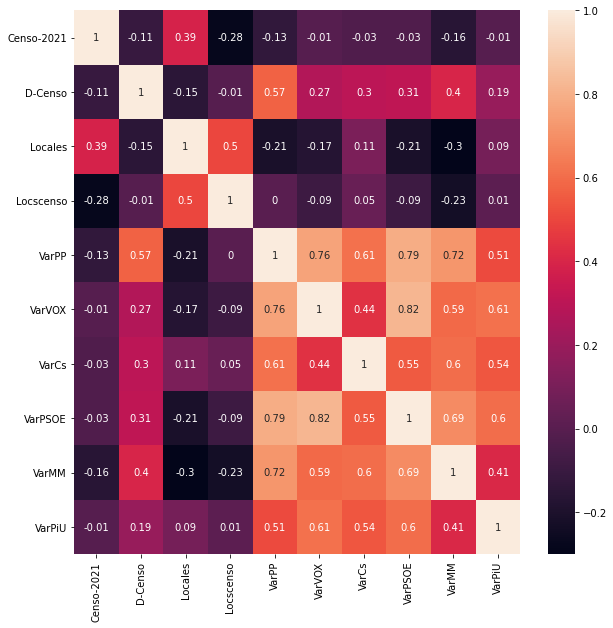

In [28]:
import seaborn as sn
import matplotlib.pyplot as plt

df = pd.DataFrame(df_MAD,columns=['Censo-2021', 'D-Censo', 'Locales',
       'Locscenso', 'VarPP', 'VarVOX', 'VarCs', 'VarPSOE', 'VarMM', 'VarPiU'])

corrMatrix = round(df.corr(), 2)
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
sn.heatmap(corrMatrix, annot=True)
#plt.figure(figsize=(20, 15))
plt.show()


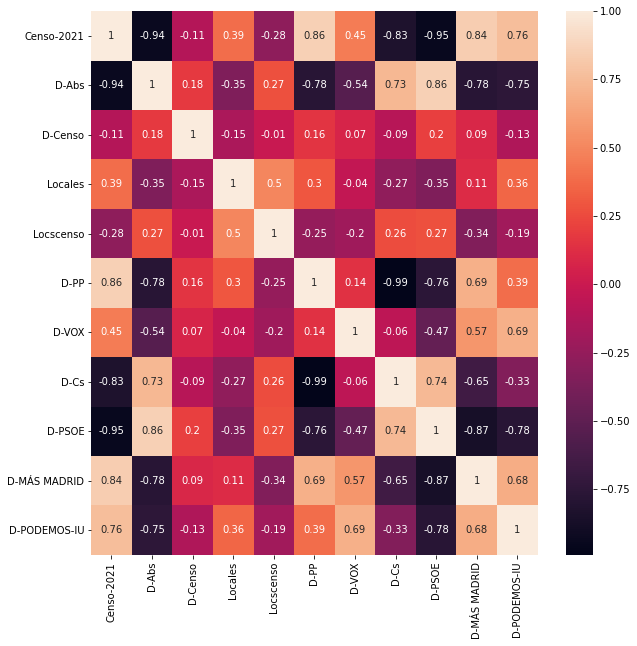

In [32]:
df = pd.DataFrame(df_MAD,columns=['Censo-2021', 'D-Abs','D-Censo', 'Locales',
       'Locscenso', 'D-PP', 'D-VOX', 'D-Cs', 'D-PSOE', 'D-MÁS MADRID', 'D-PODEMOS-IU'])

corrMatrix = round(df.corr(), 2)
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
sn.heatmap(corrMatrix, annot=True)
#plt.figure(figsize=(20, 15))
plt.show()

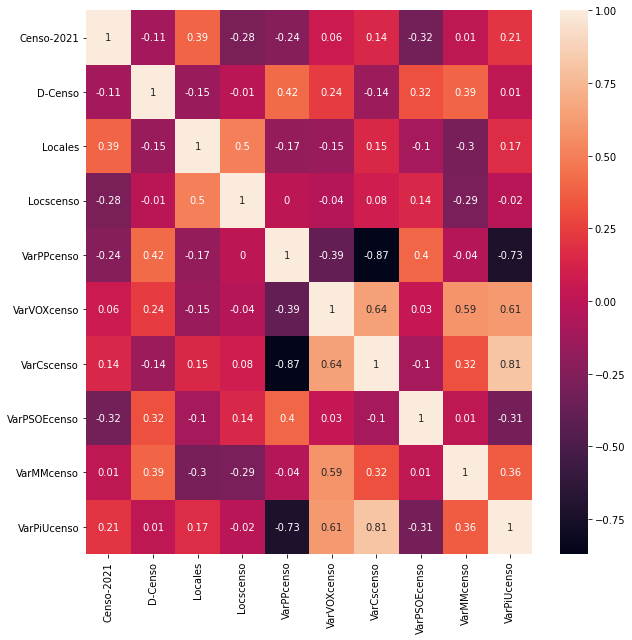

In [39]:
df = pd.DataFrame(df_MAD,columns=['Censo-2021', 'D-Censo', 'Locales',
       'Locscenso', 'VarPPcenso', 'VarVOXcenso', 'VarCscenso', 'VarPSOEcenso', 'VarMMcenso', 'VarPiUcenso'])

corrMatrix = round(df.corr(), 2)
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
sn.heatmap(corrMatrix, annot=True)
#plt.figure(figsize=(20, 15))
plt.show()